In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import numpy as np
from torchvision import datasets
import torchvision.transforms as transforms
from torch.utils.data.sampler import SubsetRandomSampler

device = "cuda" if torch.cuda.is_available() else "cpu"
device
 # mount it
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import shutil
shutil.copy("/content/drive/MyDrive/datasets/stanford_dogs/annotation.tar", "/content/data/anotation.tar")
shutil.copy("/content/drive/MyDrive/datasets/stanford_dogs/images.tar", "/content/data/images.tar")
shutil.copy("/content/drive/MyDrive/datasets/stanford_dogs/lists.tar", "/content/data/lists.tar")

shutil.unpack_archive("/content/drive/MyDrive/datasets/stanford_dogs/images.tar", "/content/data")
shutil.unpack_archive("/content/drive/MyDrive/datasets/stanford_dogs/annotation.tar", "/content/data")
shutil.unpack_archive("/content/drive/MyDrive/datasets/stanford_dogs/lists.tar", "/content/data")

import os 

PATH = '/content/data/Images'

classes = os.listdir(PATH)
classes

['n02100735-English_setter',
 'n02097658-silky_terrier',
 'n02115641-dingo',
 'n02091467-Norwegian_elkhound',
 'n02088632-bluetick',
 'n02093991-Irish_terrier',
 'n02105162-malinois',
 'n02099712-Labrador_retriever',
 'n02090721-Irish_wolfhound',
 'n02091635-otterhound',
 'n02107574-Greater_Swiss_Mountain_dog',
 'n02091134-whippet',
 'n02097209-standard_schnauzer',
 'n02085620-Chihuahua',
 'n02102177-Welsh_springer_spaniel',
 'n02113624-toy_poodle',
 'n02111277-Newfoundland',
 'n02089867-Walker_hound',
 'n02095570-Lakeland_terrier',
 'n02090379-redbone',
 'n02113978-Mexican_hairless',
 'n02106382-Bouvier_des_Flandres',
 'n02109961-Eskimo_dog',
 'n02096437-Dandie_Dinmont',
 'n02112706-Brabancon_griffon',
 'n02105412-kelpie',
 'n02106550-Rottweiler',
 'n02113186-Cardigan',
 'n02093256-Staffordshire_bullterrier',
 'n02091831-Saluki',
 'n02110627-affenpinscher',
 'n02089973-English_foxhound',
 'n02098105-soft-coated_wheaten_terrier',
 'n02107312-miniature_pinscher',
 'n02087394-Rhodesian_r

In [3]:
imgs, labels = [], []

for i, lab in enumerate(classes):
  paths = os.listdir(f'{PATH}/{lab}')
  print(f'Categoría: {lab}. Imágenes: {len(paths)}')
  paths = [p for p in paths if p[-3:] == "jpg"]
  imgs += [f'{PATH}/{lab}/{img}' for img in paths]
  labels += [i]*len(paths)

Categoría: n02100735-English_setter. Imágenes: 161
Categoría: n02097658-silky_terrier. Imágenes: 183
Categoría: n02115641-dingo. Imágenes: 156
Categoría: n02091467-Norwegian_elkhound. Imágenes: 196
Categoría: n02088632-bluetick. Imágenes: 171
Categoría: n02093991-Irish_terrier. Imágenes: 169
Categoría: n02105162-malinois. Imágenes: 150
Categoría: n02099712-Labrador_retriever. Imágenes: 171
Categoría: n02090721-Irish_wolfhound. Imágenes: 218
Categoría: n02091635-otterhound. Imágenes: 151
Categoría: n02107574-Greater_Swiss_Mountain_dog. Imágenes: 168
Categoría: n02091134-whippet. Imágenes: 187
Categoría: n02097209-standard_schnauzer. Imágenes: 155
Categoría: n02085620-Chihuahua. Imágenes: 152
Categoría: n02102177-Welsh_springer_spaniel. Imágenes: 150
Categoría: n02113624-toy_poodle. Imágenes: 151
Categoría: n02111277-Newfoundland. Imágenes: 195
Categoría: n02089867-Walker_hound. Imágenes: 153
Categoría: n02095570-Lakeland_terrier. Imágenes: 197
Categoría: n02090379-redbone. Imágenes: 148

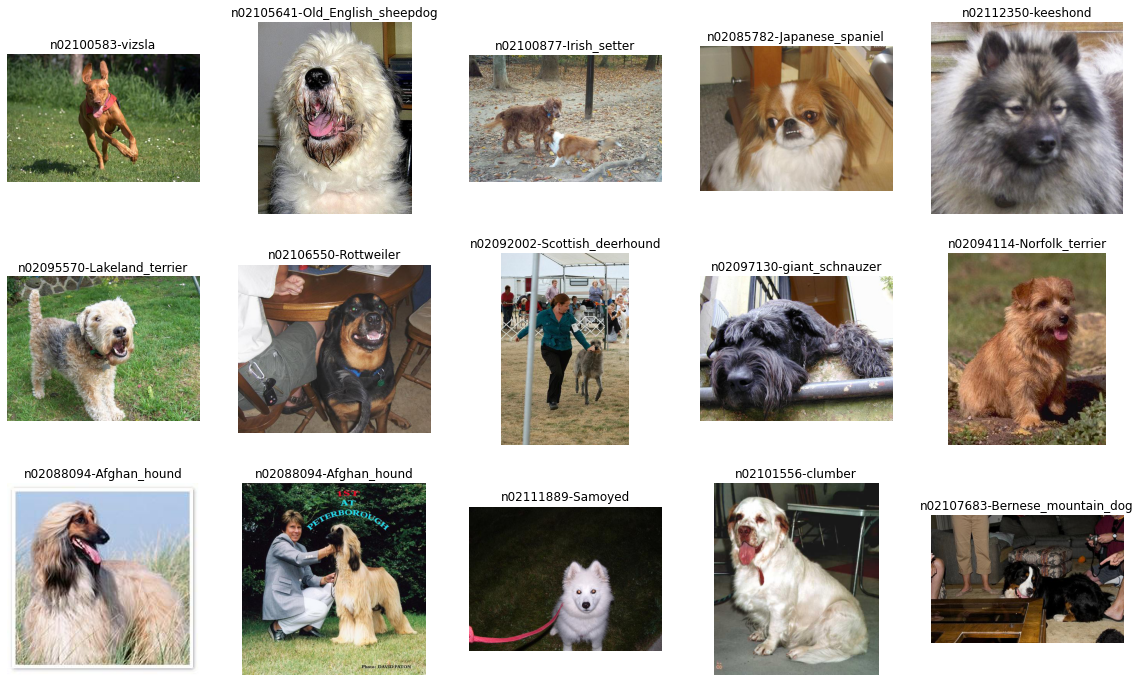

In [4]:
import random 
from skimage import io
import matplotlib.pyplot as plt

fig, axs = plt.subplots(3,5, figsize=(10*2,6*2))
for _ax in axs:
  for ax in _ax:
    ix = random.randint(0, len(imgs)-1)
    img = io.imread(imgs[ix])
    ax.imshow(img)
    ax.axis('off')
    ax.set_title(classes[labels[ix]])
plt.show()

In [5]:
from sklearn.model_selection import train_test_split

train_imgs, test_imgs, train_labels, test_labels = train_test_split(imgs, labels, test_size=0.2, stratify=labels)

len(train_imgs), len(test_imgs)

(16464, 4116)

In [6]:
import torch
device = "cuda" if torch.cuda.is_available() else "cpu"

class Dataset(torch.utils.data.Dataset):
  def __init__(self, X, y, trans, device):
    self.X = X
    self.y = y
    self.trans = trans
    self.device = device

  def __len__(self):
    return len(self.X)

  def __getitem__(self, ix):
    # cargar la imágen
    img = io.imread(self.X[ix])
    # aplicar transformaciones
    if self.trans:
      img = self.trans(image=img)["image"]
    return torch.from_numpy(img / 255.).float().permute(2,0,1), torch.tensor(self.y[ix])

In [7]:
import albumentations as A

trans = A.Compose([
    A.Resize(224, 224)
])

dataset = {
    'train': Dataset(train_imgs, train_labels, trans, device), 
    'test': Dataset(test_imgs, test_labels, trans, device)
}

len(dataset['train']), len(dataset['test'])

(16464, 4116)

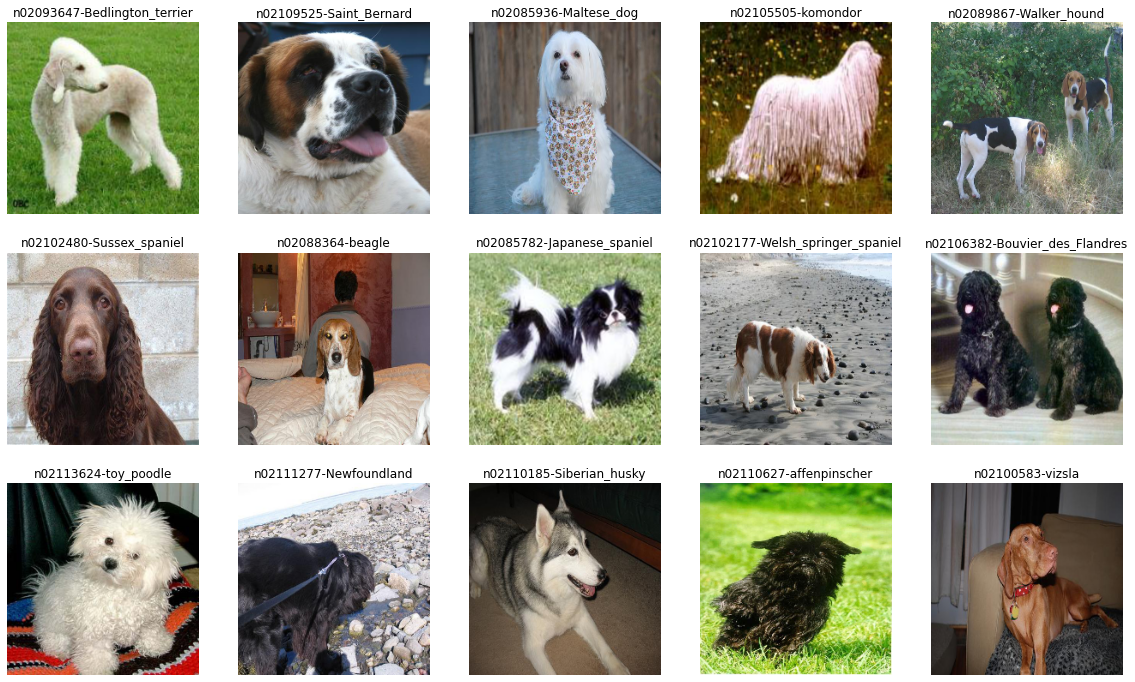

In [8]:
fig, axs = plt.subplots(3,5, figsize=(10*2,6*2))
for _ax in axs:
  for ax in _ax:
    ix = random.randint(0, len(dataset['train'])-1)
    img, lab = dataset['train'][ix]
    ax.imshow(img.permute(1,2,0))
    ax.axis('off')
    ax.set_title(classes[lab])
plt.show()

In [9]:
dataloader = {
    'train': torch.utils.data.DataLoader(dataset['train'], batch_size=64, shuffle=True, pin_memory=True), 
    'test': torch.utils.data.DataLoader(dataset['test'], batch_size=64, shuffle=False)
}

imgs, labels = next(iter(dataloader['train']))
imgs.shape

torch.Size([64, 3, 224, 224])

In [10]:
from torchvision.models.resnet import BasicBlock, Bottleneck, ResNet



In [16]:
import torchvision
resnet = torchvision.models.wide_resnet50_2(pretrained=True)
resnet

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 128, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(128, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), strid

In [3]:
import torch
class Model(torch.nn.Module):
  def __init__(self, n_outputs=120, pretrained=False, freeze=False):
    super().__init__()
    # descargamos resnet
    resnet = torchvision.models.wide_resnet50_2(pretrained=True)
    # nos quedamos con todas las capas menos la última
    self.resnet = torch.nn.Sequential(*list(resnet.children())[:-4])
    if freeze:
      for param in self.resnet.parameters():
        param.requires_grad=False
    # añadimos una nueva capa lineal para llevar a cabo la clasificación
    self.fc = torch.nn.Linear(2048, 120)

  def forward(self, x):
    x = self.resnet(x)
    x = x.view(x.shape[0], -1)
    x = self.fc(x)
    return x

  def unfreeze(self):
    for param in self.resnet.parameters():
        param.requires_grad=True

In [4]:
import torchvision
model = Model()
outputs = model(torch.randn(64, 3, 224, 224))
outputs.shape


RuntimeError: ignored

In [ ]:
from tqdm import tqdm
import numpy as np

def fit(model, dataloader, epochs=5, lr=1e-2):
    model.to(device)
    optimizer = torch.optim.SGD(model.parameters(), lr=lr)
    criterion = torch.nn.CrossEntropyLoss()
    for epoch in range(1, epochs+1):
        model.train()
        train_loss, train_acc = [], []
        bar = tqdm(dataloader['train'])
        for batch in bar:
            X, y = batch
            X, y = X.to(device), y.to(device)
            optimizer.zero_grad()
            y_hat = model(X)
            loss = criterion(y_hat, y)
            loss.backward()
            optimizer.step()
            train_loss.append(loss.item())
            acc = (y == torch.argmax(y_hat, axis=1)).sum().item() / len(y)
            train_acc.append(acc)
            bar.set_description(f"loss {np.mean(train_loss):.5f} acc {np.mean(train_acc):.5f}")
        bar = tqdm(dataloader['test'])
        val_loss, val_acc = [], []
        model.eval()
        with torch.no_grad():
            for batch in bar:
                X, y = batch
                X, y = X.to(device), y.to(device)
                y_hat = model(X)
                loss = criterion(y_hat, y)
                val_loss.append(loss.item())
                acc = (y == torch.argmax(y_hat, axis=1)).sum().item() / len(y)
                val_acc.append(acc)
                bar.set_description(f"val_loss {np.mean(val_loss):.5f} val_acc {np.mean(val_acc):.5f}")
        print(f"Epoch {epoch}/{epochs} loss {np.mean(train_loss):.5f} val_loss {np.mean(val_loss):.5f} acc {np.mean(train_acc):.5f} val_acc {np.mean(val_acc):.5f}")

In [ ]:
model = Model()
fit(model, dataloader, epochs=15)